In [19]:
class BSTree():
    # Binary Search Tree Class
    #needs to know:
    #Root (BSTNode)
    #Size (int)
    # needs to do:
    # hasKey(key)
    # add(key, value)
    # get(key)   - Make sure this returns a keyerror if cant find it 
    # remove(key)
    # update(key,value)
    # search(key) - returns Node Object associated with a key
    
    def __init__(self):
        self.root = None
        self.size = 0
        
    def add(self,key,value):
        if self.root is None:
            self.root = BSTNode(key, value, None)
            self.size += 1
            return self.root
            
        else:
            try:
                return self.update(key,value)       #Lets just say that this covers the case where we try and add a duplicate key
            except KeyError:
                new_node = self.recursive_insert(self.root, key, value)
                self.size += 1
                return new_node
    
    def recursive_insert(self, sub_root, key, value):
        if key < sub_root.key:
            if sub_root.left_child is None:
                sub_root.left_child = BSTNode(key, value, sub_root)
                return sub_root.left_child
            else:
                return self.recursive_insert(sub_root.left_child, key, value)
        else:
            
            if sub_root.right_child is None:
                sub_root.right_child = BSTNode(key, value, sub_root)
                return sub_root.right_child
            else:
                return self.recursive_insert(sub_root.right_child, key, value)
                
    def update(self, key, value):
        node = self.search(key)
        node.value = value
        return node
        
    def search(self,key):
        return self.recursive_search(self.root, key)
        
    def recursive_search(self,sub_root,key):
        if sub_root.key == key:
            return sub_root

        else:
            if key < sub_root.key:
                if sub_root.left_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.left_child, key)
                    
            else:
                if sub_root.right_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.right_child, key)
        
    def hasKey(self, key):
        try:
            self.search(key)
            return True
        except KeyError:
            return False
        
    def get(self, key):
        return self.search(key).value
    
class BSTNode():
    #Node in a Binary Search Tree
    #Node needs to know:
    #Their key (int)
    #thier valie (any data)
    #left child (BSTNode)
    #right child (BSTNode)
    # parent (BSTNode)
    
    def __init__(self,key,value,parent):
        self.key = key
        self.value = value 
        self.parent = parent
        self.left_child = None
        self.right_child = None

In [20]:
class AVLNode(BSTNode):
    
    def __init__(self,key,value,parent):
        super(AVLNode,self).__init__(key,value,parent)
        self.height = 0
        self.bf = 0

In [34]:
class AVLTree(BSTree):
    
    def __init__(self):
        super(AVLTree,self).__init__()
        
    def add(self, key, value):
        valueToRotate = None
        # Add the new node to the tree:
        new_node = super(AVLTree, self).add(key,value)
        
        if new_node.left_child is None and new_node.right_child is None:
            new_node.height = 0
            current = new_node
            
            while current != self.root:
                current.parent.height = max( current.parent.height, current.height + 1 )                       
                left_height = (current.left_child.height + 1) if current.left_child is not None else 0
                right_height = (current.right_child.height + 1) if current.right_child is not None else 0
                current.bf = left_height - right_height
                            
                if current.bf == 2 or current.bf == -2:           
                    self.rotate(current)
                    self.rebalance(current)
                    #valueToRotate = current
                        
                current = current.parent 
                
            leftHeight = ( self.root.left_child.height + 1) if self.root.left_child is not None else 0 
            rightHeight = ( self.root.right_child.height + 1) if self.root.right_child is not None else 0  
            self.root.bf = leftHeight - rightHeight
            
            if self.root.bf == 2 or self.root.bf == -2:      
                self.rotate(self.root)
                self.rebalance(self.root)
                #valueToRotate = self.root
                
       # print("root")
        #print (self.root.value)                         #Printing test method 
        #print (self.root.bf)
                    
        #self.checkMethod(self.root)
                    
        #if valueToRotate is not None:
            #self.rotate(valueToRotate)               #After rebalance do I need to recheck all the bf not contiue, maybe break? 
            #self.rebalance(valueToRotate)
           
        self.checkMethod(self.root)
        return new_node
            #Check if the tree is balanced 
            #Rebalance if necessary    
        
    def rebalance(self,node):   
        print ("rebalance ________")
        print (node.value)
        
        if node.left_child is not None:
            self.rebalance(node.left_child)
        if node.right_child is not None:
            self.rebalance(node.right_child)
            
        #Broken if its here
        if node.parent is not None:
            node.parent.height = max( node.parent.height, node.height + 1 ) 
            
        left_height = (node.left_child.height + 1) if node.left_child is not None else 0
        right_height = (node.right_child.height + 1) if node.right_child is not None else 0
        node.height = max(left_height, right_height)
        node.bf = left_height - right_height
        
        #Or here
        
        
    def rotate(self, current):
        
        print ("rotate _________")
                
        if current.bf == 2 and current.left_child.bf == 1:                  #Left-Left case
            print ("LeftLeft")
            self.leftLeft(current)
                
        elif current.bf == 2 and current.left_child.bf == -1:               #Left-Right Case
            print ("LeftRight")
            self.leftRight(current)
            
        elif current.bf == -2 and current.right_child.bf == -1:             #Right-Right case
            print ("RightRight")
            self.rightRight(current)
            
            
        elif current.bf == -2 and current.right_child.bf == 1:              #Right-Left case
            print ("RightLeft")
            self.rightLeft(current)
            
        else:
            print ("None")
            #print ("current value height and bf")
            #print (current.value)
            #print (current.height)
            #print (current.bf)                                           #For testing
            
           #if current.left_child is not None:
                #print ("Left Child value height and bf")
                #print (current.left_child.value)
                #print (current.left_child.height)
                #print (current.left_child.bf)
            
            #if current.right_child is not None:
                #print ("Right Child value height and bf")
                #print (current.right_child.value)
                #print (current.right_child.height)
                #print (current.right_child.bf)
                
        self.checkMethod(self.root)
            
    def leftRight(self,current):        
        child = current.left_child
        grandchild = child.right_child
        
        greatGrandChildRight = None
        greatGrandChildLeft = None
        
        if grandchild.right_child is not None: 
            greatGrandChildRight = grandchild.right_child
       
        if grandchild.left_child is not None:
            greatGrandChildLeft = grandchild.left_child
        
        if current is self.root:
            self.root = grandchild
            grandchild.parent = None
            
        if current.parent is not None:
            parent = current.parent 
            
            parent_left_child =  parent.left_child
            parent_right_child = parent.right_child
            
            if parent_left_child.value is not None:
                if parent_left_child.value == current.value:
                    parent.left_child = grandchild
                    grandchild.parent = parent
            
            elif parent_right_child.value is not None:
                if parent_right_child.value == current.value:
                    parent.right_child = grandchild
                    grandchild.parent = parent
            
        grandchild.left_child = child
        child.parent = grandchild
        
        grandchild.right_child = current
        current.parent = grandchild
        
        current.left_child = greatGrandChildRight
        if greatGrandChildRight is not None:
            greatGrandChildRight.parent = current
           
        child.right_child = greatGrandChildLeft
        if greatGrandChildLeft is not None:
            greatGrandChildLeft.parent = child
        
        
    def leftLeft(self,current):           
        child = current.left_child
        grandchild = current.left_child.left_child

        if current is self.root:
            self.root = child
            child.parent = None

        if current.parent is not None:
            parent = current.parent 
            
            parent_left_child =  parent.left_child
            parent_right_child = parent.right_child
            
            if parent_left_child.value is not None:
                if parent_left_child.value == current.value:
                    parent.left_child = child
                    child.parent = parent
            
            elif parent_right_child.value is not None:
                if parent_right_child.value == current.value:
                    parent.right_child = child
                    child.parent = parent
            #parent.left_child = child
            #child.parent = parent

        if child.right_child is not None:
            hold = child.right_child
            current.left_child = hold
            hold.parent = current
        else:
            current.left_child = None

        child.right_child = current
        current.parent = child
        
    def rightRight(self,current):
        
        #print (current.value)
        child = current.right_child
        grandchild = current.right_child.right_child

        if current is self.root:
            self.root = child
            child.parent = None

        if current.parent is not None:
            parent = current.parent 
            
            parent_left_child =  parent.left_child
            parent_right_child = parent.right_child
            
            if parent_left_child.value is not None:
                if parent_left_child.value == current.value:
                    parent.left_child = child
                    child.parent = parent

            elif parent_right_child.value is not None:        
                if parent_right_child.value == current.value:
                    parent.right_child = child
                    child.parent = parent

        if child.left_child is not None:
            hold = child.left_child
            current.right_child = hold
            hold.parent = current
        else:
            current.right_child = None

        child.left_child = current
        current.parent = child
        
        
    def rightLeft(self,current):        
        child = current.right_child
        grandchild = child.left_child
        
        greatGrandChildLeft = None
        greatGrandChildRight = None
        
        if grandchild.left_child is not None: 
            greatGrandChildLeft = grandchild.left_child
       
        if grandchild.right_child is not None:
            greatGrandChildRight = grandchild.right_child
        
        if current is self.root:
            self.root = grandchild
            grandchild.parent = None
            
        if current.parent is not None:
            parent = current.parent 
            
            parent_left_child =  parent.left_child
            parent_right_child = parent.right_child
            
            if parent_left_child.value is not None:
                if parent_left_child.value == current.value:
                    parent.left_child = grandchild
                    grandchild.parent = parent
                    
            elif parent_right_child.value is not None:
                if parent_right_child.value == current.value:
                    parent.right_child = grandchild
                    grandchild.parent = parent
            
            
        grandchild.right_child = child
        child.parent = grandchild
        
        grandchild.left_child = current
        current.parent = grandchild
        
        current.right_child = greatGrandChildLeft
        if greatGrandChildLeft is not None:
            greatGrandChildLeft.parent = current
            
        child.left_child = greatGrandChildRight
        if greatGrandChildRight is not None:
            greatGrandChildRight.parent = child
        
        
    def checkMethod(self,node):
        
        print ()
        print ("Value")
        print (node.key)
        print (node.value)
        print ("height")
        print (node.height)
        print ("bf")
        print (node.bf)
        print ("parent")
        if node.parent is not None:
            print (node.parent.value)
            
        print ("left_child")
        if node.left_child is not None:
            print (node.left_child.value)
            
        print ("right_child")
        if node.right_child is not None:
            print (node.right_child.value)
        
                
        if node.left_child is not None:
            self.checkMethod(node.left_child)
                    
        if node.right_child is not None:
            self.checkMethod(node.right_child)   

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [36]:
def timeTrial(n):
    import random 
    import time
    listVal = []
    tree = AVLTree()

    for nodes in range(n):
        listVal.append(nodes)

    random.shuffle(listVal)

    timeStart = time.time()

    for y in listVal:
        #print("Add",y)
        tree.add(y, y)
        
    timeEnd = time.time()
    #print("size",tree.size)
    return [ (timeEnd - timeStart), tree]
    
def searchTrial(theTree,numNodes):
    import time
    timeStart = time.time()
    
    for x in range(numNodes):
        #print (x)
        theTree.search(x)
    
    timeEnd = time.time()
    
    return timeEnd - timeStart

Text(0.5, 0, 'Number of n in the Tree')

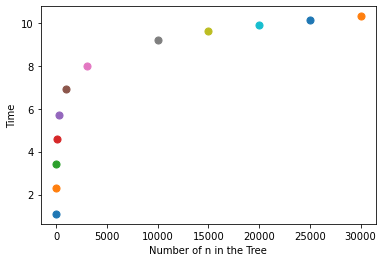

In [42]:
listOfNodes = [3,10,30,100,300,1000,3000,10000,15000,20000,25000,30000]
listOfNumberRotations = []
listOfNodesSize = []
listOfSearchTimes = []



for numNodes in listOfNodes:    
        
    for numberTrials in range(50):
        numberRotations = 0
        trial = timeTrial( numNodes )
        
        timeInsert, theTree = trial
        
        timeSearch = searchTrial(theTree,numNodes)
        listOfSearchTimes.append(timeSearch)
        
        listOfNumberRotations.append(numberRotations)
        listOfNodesSize.append(numNodes)
        
        plt.scatter( numNodes ,timeInsert,50)
        

plt.ylabel("Time")
plt.xlabel("Number of n in the Tree")

In [ ]:
for x in range( len( listOfNumberRotations ) ):
    plt.scatter( listOfNodesSize[x], listOfNumberRotations[x], 50)
    
plt.ylabel("Number of Rotations")
plt.xlabel("Number of n in the Tree")

In [ ]:
for x in range( len( listOfSearchTimes ) ):
    plt.scatter( listOfNodesSize[x], listOfSearchTimes[x], 50 )
    
plt.ylabel("Search Time")
plt.xlabel("Number of n in the Tree")

In [33]:
import random
tree = AVLTree()
listVal = []

for nodes in range(10):
    listVal.append(nodes)

random.shuffle(listVal)


for y in listVal:
    print (y)
    tree.add(y, y)
    
print ("done")

2
8
1
7
3


KeyboardInterrupt: 